In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pgmpy.estimators import PC
import networkx as nx
from tqdm.notebook import tqdm
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

In [3]:
wave5 = pd.read_csv('../data/wave5NEW.csv')  
wave6 = pd.read_csv('../data/wave6NEW.csv')

In [4]:
w5 = wave5[['support_cc_policy', 'attitudes_cc', 'support_govern_cv', 'trust_officials', 'harm_ex_weather']]
w6 = wave6[['support_cc_policy', 'attitudes_cc', 'support_govern_cv', 'trust_officials', 'harm_ex_weather']]

data = pd.concat([w5, w6], ignore_index=True)

In [5]:
from tqdm import tqdm
from causallearn.search.ConstraintBased.FCI import fci

# Parameters 
n_bootstraps = 1000
alphas = [0.01, 0.05]
node_labels = ['support_cc_policy', 'attitudes_cc', 'support_govern_cv',
               'trust_officials', 'harm_ex_weather']
n_nodes = len(node_labels)

# Initialize counts for each direction 
endpoint_counts = {
    (source, target): {'o': 0, '-': 0, '<': 0}
    for source in node_labels for target in node_labels if source != target
}

# Random alpha assignment (50/50 split) 
alpha_assignments = [0.01] * (n_bootstraps // 2) + [0.05] * (n_bootstraps // 2)
np.random.seed(42)
np.random.shuffle(alpha_assignments)

# Bootstrap FCI
for i in tqdm(range(n_bootstraps), desc="Bootstrapping FCI"):
    alpha = float(alpha_assignments[i])
    boot_sample = data.sample(n=len(data), replace=True, random_state=i).to_numpy()

    graph_fci, _ = fci(boot_sample, ci_test='pearsonr', alpha=alpha)
    #print(graph_fci)
    for i_node, source in enumerate(node_labels):
        for j_node, target in enumerate(node_labels):
            if source == target:
                continue

            code = graph_fci.graph[i_node, j_node]

            # Convert edge code to symbol
            symbol = None
            if code == 1:
                symbol = '<'
            elif code == 2:
                symbol = 'o'
            elif code == -1:
                symbol = '-'

            # Count the symbol
            if symbol is not None:
                endpoint_counts[(source, target)][symbol] += 1

Bootstrapping FCI:   0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   0%|          | 2/1000 [00:00<00:54, 18.17it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   0%|          | 5/1000 [00:00<00:42, 23.50it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   1%|          | 8/1000 [00:00<00:40, 24.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   1%|          | 11/1000 [00:00<00:40, 24.15it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   1%|▏         | 14/1000 [00:00<00:40, 24.11it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   2%|▏         | 17/1000 [00:00<00:39, 25.07it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   2%|▏         | 20/1000 [00:00<00:39, 24.55it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   2%|▏         | 23/1000 [00:00<00:40, 24.27it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   3%|▎         | 26/1000 [00:01<00:39, 24.49it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   3%|▎         | 29/1000 [00:01<00:39, 24.72it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   3%|▎         | 32/1000 [00:01<00:37, 25.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   4%|▎         | 35/1000 [00:01<00:38, 25.05it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   4%|▍         | 38/1000 [00:01<00:41, 23.29it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   4%|▍         | 41/1000 [00:01<00:40, 23.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   4%|▍         | 44/1000 [00:01<00:39, 24.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   5%|▍         | 47/1000 [00:01<00:38, 24.97it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   5%|▌         | 50/1000 [00:02<00:36, 25.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   5%|▌         | 53/1000 [00:02<00:36, 26.16it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   6%|▌         | 56/1000 [00:02<00:36, 26.18it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   6%|▌         | 59/1000 [00:02<00:36, 26.10it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   6%|▌         | 62/1000 [00:02<00:34, 27.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   7%|▋         | 66/1000 [00:02<00:33, 28.01it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   7%|▋         | 69/1000 [00:02<00:33, 27.48it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   7%|▋         | 72/1000 [00:02<00:33, 27.58it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   8%|▊         | 75/1000 [00:02<00:34, 27.20it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   8%|▊         | 78/1000 [00:03<00:33, 27.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   8%|▊         | 81/1000 [00:03<00:34, 26.91it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   8%|▊         | 84/1000 [00:03<00:34, 26.92it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   9%|▊         | 87/1000 [00:03<00:33, 27.31it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   9%|▉         | 90/1000 [00:03<00:33, 27.33it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:   9%|▉         | 93/1000 [00:03<00:33, 27.45it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  10%|▉         | 96/1000 [00:03<00:33, 26.89it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  10%|▉         | 99/1000 [00:03<00:33, 27.03it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  10%|█         | 102/1000 [00:03<00:33, 27.10it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  10%|█         | 105/1000 [00:04<00:34, 26.18it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  11%|█         | 108/1000 [00:04<00:33, 26.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  11%|█         | 111/1000 [00:04<00:32, 27.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  11%|█▏        | 114/1000 [00:04<00:31, 27.96it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  12%|█▏        | 117/1000 [00:04<00:32, 27.40it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  12%|█▏        | 120/1000 [00:04<00:31, 27.84it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  12%|█▏        | 123/1000 [00:04<00:32, 27.39it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  13%|█▎        | 126/1000 [00:04<00:35, 24.29it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  13%|█▎        | 129/1000 [00:05<00:36, 23.70it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  13%|█▎        | 132/1000 [00:05<00:36, 23.87it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  14%|█▎        | 135/1000 [00:05<00:34, 25.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  14%|█▍        | 138/1000 [00:05<00:33, 25.78it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  14%|█▍        | 141/1000 [00:05<00:32, 26.28it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  14%|█▍        | 144/1000 [00:05<00:32, 26.29it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  15%|█▍        | 147/1000 [00:05<00:32, 25.92it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  15%|█▌        | 150/1000 [00:05<00:31, 26.86it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  15%|█▌        | 153/1000 [00:05<00:31, 26.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  16%|█▌        | 156/1000 [00:06<00:30, 27.30it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  16%|█▌        | 159/1000 [00:06<00:30, 27.57it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  16%|█▌        | 162/1000 [00:06<00:30, 27.05it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  16%|█▋        | 165/1000 [00:06<00:32, 25.93it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  17%|█▋        | 168/1000 [00:06<00:32, 25.77it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  17%|█▋        | 171/1000 [00:06<00:32, 25.77it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  17%|█▋        | 174/1000 [00:06<00:30, 26.71it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  18%|█▊        | 178/1000 [00:06<00:29, 27.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  18%|█▊        | 181/1000 [00:06<00:29, 27.70it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  18%|█▊        | 184/1000 [00:07<00:29, 27.22it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  19%|█▊        | 187/1000 [00:07<00:30, 27.10it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  19%|█▉        | 190/1000 [00:07<00:29, 27.36it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  19%|█▉        | 193/1000 [00:07<00:30, 26.41it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  20%|█▉        | 196/1000 [00:07<00:30, 26.64it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  20%|█▉        | 199/1000 [00:07<00:29, 27.11it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  20%|██        | 202/1000 [00:07<00:29, 27.07it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  20%|██        | 205/1000 [00:07<00:29, 27.05it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  21%|██        | 208/1000 [00:07<00:29, 27.00it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  21%|██        | 211/1000 [00:08<00:28, 27.40it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  22%|██▏       | 215/1000 [00:08<00:27, 28.06it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  22%|██▏       | 218/1000 [00:08<00:27, 28.09it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  22%|██▏       | 221/1000 [00:08<00:27, 28.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  22%|██▏       | 224/1000 [00:08<00:28, 27.53it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  23%|██▎       | 227/1000 [00:08<00:29, 26.62it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  23%|██▎       | 230/1000 [00:08<00:28, 27.37it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  23%|██▎       | 233/1000 [00:08<00:27, 27.56it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  24%|██▎       | 236/1000 [00:08<00:28, 26.95it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  24%|██▍       | 239/1000 [00:09<00:28, 27.02it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  24%|██▍       | 242/1000 [00:09<00:28, 26.88it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  24%|██▍       | 245/1000 [00:09<00:28, 26.47it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  25%|██▍       | 248/1000 [00:09<00:27, 27.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  25%|██▌       | 251/1000 [00:09<00:28, 26.50it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  25%|██▌       | 254/1000 [00:09<00:27, 26.78it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  26%|██▌       | 257/1000 [00:09<00:28, 26.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  26%|██▌       | 260/1000 [00:09<00:29, 24.75it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  26%|██▋       | 263/1000 [00:10<00:29, 25.07it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  27%|██▋       | 266/1000 [00:10<00:28, 25.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  27%|██▋       | 269/1000 [00:10<00:27, 26.47it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  27%|██▋       | 272/1000 [00:10<00:28, 25.41it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X1 --> X3
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  28%|██▊       | 275/1000 [00:10<00:27, 26.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  28%|██▊       | 278/1000 [00:10<00:27, 26.47it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  28%|██▊       | 281/1000 [00:10<00:26, 27.03it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  28%|██▊       | 284/1000 [00:10<00:26, 27.28it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X4
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  29%|██▊       | 287/1000 [00:10<00:26, 26.94it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  29%|██▉       | 290/1000 [00:10<00:25, 27.43it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  29%|██▉       | 293/1000 [00:11<00:27, 26.05it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  30%|██▉       | 296/1000 [00:11<00:26, 26.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  30%|██▉       | 299/1000 [00:11<00:26, 26.15it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  30%|███       | 302/1000 [00:11<00:26, 26.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


Bootstrapping FCI:  30%|███       | 305/1000 [00:11<00:26, 26.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  31%|███       | 308/1000 [00:11<00:26, 26.33it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  31%|███       | 311/1000 [00:11<00:27, 25.35it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  31%|███▏      | 314/1000 [00:11<00:26, 25.51it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  32%|███▏      | 317/1000 [00:12<00:25, 26.58it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  32%|███▏      | 320/1000 [00:12<00:24, 27.22it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  32%|███▏      | 323/1000 [00:12<00:25, 26.67it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  33%|███▎      | 326/1000 [00:12<00:25, 26.83it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  33%|███▎      | 329/1000 [00:12<00:25, 26.77it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  33%|███▎      | 332/1000 [00:12<00:24, 27.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  34%|███▎      | 335/1000 [00:12<00:25, 25.88it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  34%|███▍      | 338/1000 [00:12<00:24, 26.60it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  34%|███▍      | 341/1000 [00:12<00:25, 25.48it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  34%|███▍      | 344/1000 [00:13<00:24, 26.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  35%|███▍      | 347/1000 [00:13<00:24, 26.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  35%|███▌      | 351/1000 [00:13<00:24, 26.98it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  35%|███▌      | 354/1000 [00:13<00:24, 26.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  36%|███▌      | 357/1000 [00:13<00:23, 26.93it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  36%|███▌      | 360/1000 [00:13<00:23, 26.95it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  36%|███▋      | 363/1000 [00:13<00:23, 26.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  37%|███▋      | 366/1000 [00:13<00:23, 26.98it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  37%|███▋      | 369/1000 [00:13<00:23, 27.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  37%|███▋      | 372/1000 [00:14<00:23, 26.67it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  38%|███▊      | 375/1000 [00:14<00:23, 26.46it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  38%|███▊      | 378/1000 [00:14<00:23, 26.08it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  38%|███▊      | 381/1000 [00:14<00:23, 26.43it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  38%|███▊      | 384/1000 [00:14<00:23, 26.51it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  39%|███▊      | 387/1000 [00:14<00:23, 25.62it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  39%|███▉      | 390/1000 [00:14<00:24, 25.23it/s]

X1 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  39%|███▉      | 393/1000 [00:14<00:23, 25.40it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  40%|███▉      | 396/1000 [00:15<00:23, 25.93it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  40%|███▉      | 399/1000 [00:15<00:22, 26.23it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  40%|████      | 402/1000 [00:15<00:23, 25.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  40%|████      | 405/1000 [00:15<00:22, 25.98it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  41%|████      | 408/1000 [00:15<00:22, 25.95it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  41%|████      | 411/1000 [00:15<00:22, 25.66it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  41%|████▏     | 414/1000 [00:15<00:22, 26.07it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  42%|████▏     | 417/1000 [00:15<00:22, 25.72it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  42%|████▏     | 420/1000 [00:15<00:22, 25.71it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  42%|████▏     | 423/1000 [00:16<00:22, 26.15it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  43%|████▎     | 426/1000 [00:16<00:21, 26.11it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  43%|████▎     | 429/1000 [00:16<00:21, 26.67it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  43%|████▎     | 432/1000 [00:16<00:20, 27.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  44%|████▎     | 435/1000 [00:16<00:21, 25.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  44%|████▍     | 438/1000 [00:16<00:22, 24.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  44%|████▍     | 441/1000 [00:16<00:22, 24.31it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  44%|████▍     | 444/1000 [00:16<00:22, 24.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  45%|████▍     | 447/1000 [00:17<00:22, 24.31it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  45%|████▌     | 450/1000 [00:17<00:23, 23.51it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  45%|████▌     | 453/1000 [00:17<00:23, 23.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  46%|████▌     | 456/1000 [00:17<00:22, 23.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  46%|████▌     | 459/1000 [00:17<00:23, 23.32it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  46%|████▌     | 462/1000 [00:17<00:23, 23.15it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  46%|████▋     | 465/1000 [00:17<00:23, 23.01it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  47%|████▋     | 468/1000 [00:17<00:22, 23.30it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  47%|████▋     | 471/1000 [00:18<00:22, 23.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  47%|████▋     | 474/1000 [00:18<00:22, 23.70it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  48%|████▊     | 477/1000 [00:18<00:22, 23.50it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  48%|████▊     | 480/1000 [00:18<00:21, 24.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  48%|████▊     | 483/1000 [00:18<00:20, 25.44it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  49%|████▊     | 486/1000 [00:18<00:19, 25.79it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  49%|████▉     | 489/1000 [00:18<00:19, 26.30it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  49%|████▉     | 492/1000 [00:18<00:19, 26.28it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1

Bootstrapping FCI:  50%|████▉     | 495/1000 [00:18<00:19, 26.03it/s]


X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  50%|████▉     | 498/1000 [00:19<00:19, 26.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  50%|█████     | 501/1000 [00:19<00:18, 26.70it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  50%|█████     | 504/1000 [00:19<00:18, 26.85it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  51%|█████     | 507/1000 [00:19<00:18, 26.36it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  51%|█████     | 510/1000 [00:19<00:18, 26.34it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  51%|█████▏    | 513/1000 [00:19<00:20, 23.20it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  52%|█████▏    | 516/1000 [00:19<00:21, 22.20it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  52%|█████▏    | 519/1000 [00:19<00:20, 23.04it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  52%|█████▏    | 522/1000 [00:20<00:20, 23.90it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  52%|█████▎    | 525/1000 [00:20<00:19, 24.77it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  53%|█████▎    | 528/1000 [00:20<00:18, 26.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  53%|█████▎    | 531/1000 [00:20<00:17, 26.57it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  53%|█████▎    | 534/1000 [00:20<00:17, 26.58it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  54%|█████▎    | 537/1000 [00:20<00:18, 25.68it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  54%|█████▍    | 540/1000 [00:20<00:17, 25.90it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  54%|█████▍    | 543/1000 [00:20<00:17, 26.48it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  55%|█████▍    | 546/1000 [00:20<00:16, 27.01it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  55%|█████▍    | 549/1000 [00:21<00:16, 26.90it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  55%|█████▌    | 552/1000 [00:21<00:17, 26.22it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  56%|█████▌    | 555/1000 [00:21<00:17, 25.57it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  56%|█████▌    | 558/1000 [00:21<00:17, 25.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  56%|█████▌    | 561/1000 [00:21<00:17, 25.01it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  56%|█████▋    | 564/1000 [00:21<00:17, 25.16it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  57%|█████▋    | 567/1000 [00:21<00:17, 25.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  57%|█████▋    | 570/1000 [00:21<00:17, 25.28it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  57%|█████▋    | 573/1000 [00:22<00:16, 25.52it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  58%|█████▊    | 576/1000 [00:22<00:15, 26.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  58%|█████▊    | 579/1000 [00:22<00:16, 26.29it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  58%|█████▊    | 582/1000 [00:22<00:15, 27.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  58%|█████▊    | 585/1000 [00:22<00:15, 27.17it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  59%|█████▉    | 588/1000 [00:22<00:15, 27.22it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  59%|█████▉    | 591/1000 [00:22<00:14, 27.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  59%|█████▉    | 594/1000 [00:22<00:14, 27.23it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  60%|█████▉    | 597/1000 [00:22<00:14, 27.08it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  60%|██████    | 600/1000 [00:23<00:14, 26.81it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  60%|██████    | 603/1000 [00:23<00:14, 27.18it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  61%|██████    | 606/1000 [00:23<00:14, 26.77it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  61%|██████    | 609/1000 [00:23<00:14, 27.40it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  61%|██████    | 612/1000 [00:23<00:14, 27.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X4
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  62%|██████▏   | 615/1000 [00:23<00:14, 26.18it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  62%|██████▏   | 618/1000 [00:23<00:14, 25.78it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  62%|██████▏   | 621/1000 [00:23<00:14, 25.84it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  62%|██████▏   | 624/1000 [00:23<00:14, 26.24it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  63%|██████▎   | 627/1000 [00:24<00:14, 26.31it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  63%|██████▎   | 630/1000 [00:24<00:14, 26.41it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  63%|██████▎   | 633/1000 [00:24<00:13, 26.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  64%|██████▎   | 636/1000 [00:24<00:14, 25.96it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  64%|██████▍   | 639/1000 [00:24<00:13, 26.07it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  64%|██████▍   | 642/1000 [00:24<00:13, 26.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  64%|██████▍   | 645/1000 [00:24<00:13, 26.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  65%|██████▍   | 648/1000 [00:24<00:13, 26.42it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  65%|██████▌   | 651/1000 [00:24<00:12, 27.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  65%|██████▌   | 654/1000 [00:25<00:12, 27.18it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  66%|██████▌   | 657/1000 [00:25<00:13, 25.81it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  66%|██████▌   | 660/1000 [00:25<00:13, 25.63it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  66%|██████▋   | 663/1000 [00:25<00:12, 25.93it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  67%|██████▋   | 666/1000 [00:25<00:12, 25.83it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


Bootstrapping FCI:  67%|██████▋   | 669/1000 [00:25<00:12, 25.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  67%|██████▋   | 672/1000 [00:25<00:12, 26.16it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  68%|██████▊   | 675/1000 [00:25<00:12, 25.80it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  68%|██████▊   | 678/1000 [00:26<00:11, 26.89it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  68%|██████▊   | 681/1000 [00:26<00:11, 27.07it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  68%|██████▊   | 684/1000 [00:26<00:11, 27.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  69%|██████▊   | 687/1000 [00:26<00:11, 27.35it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  69%|██████▉   | 690/1000 [00:26<00:11, 27.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  69%|██████▉   | 693/1000 [00:26<00:11, 27.64it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  70%|██████▉   | 696/1000 [00:26<00:11, 26.39it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  70%|██████▉   | 699/1000 [00:26<00:11, 26.38it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  70%|███████   | 702/1000 [00:26<00:11, 26.68it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  70%|███████   | 705/1000 [00:27<00:10, 26.90it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  71%|███████   | 708/1000 [00:27<00:10, 27.47it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  71%|███████   | 711/1000 [00:27<00:10, 26.68it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  71%|███████▏  | 714/1000 [00:27<00:11, 25.77it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  72%|███████▏  | 717/1000 [00:27<00:10, 26.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X4
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  72%|███████▏  | 720/1000 [00:27<00:10, 25.81it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  72%|███████▏  | 723/1000 [00:27<00:10, 26.25it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  73%|███████▎  | 726/1000 [00:27<00:10, 26.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  73%|███████▎  | 730/1000 [00:27<00:09, 27.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  73%|███████▎  | 733/1000 [00:28<00:09, 27.63it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  74%|███████▎  | 736/1000 [00:28<00:09, 27.15it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  74%|███████▍  | 739/1000 [00:28<00:09, 27.23it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  74%|███████▍  | 742/1000 [00:28<00:09, 27.39it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  74%|███████▍  | 745/1000 [00:28<00:09, 27.26it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  75%|███████▍  | 748/1000 [00:28<00:09, 26.84it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  75%|███████▌  | 751/1000 [00:28<00:09, 27.01it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  75%|███████▌  | 754/1000 [00:28<00:09, 26.15it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  76%|███████▌  | 757/1000 [00:28<00:09, 25.87it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  76%|███████▌  | 760/1000 [00:29<00:08, 26.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  76%|███████▋  | 763/1000 [00:29<00:09, 26.31it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  77%|███████▋  | 766/1000 [00:29<00:08, 26.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  77%|███████▋  | 769/1000 [00:29<00:08, 26.38it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  77%|███████▋  | 772/1000 [00:29<00:08, 26.61it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  78%|███████▊  | 775/1000 [00:29<00:08, 26.57it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  78%|███████▊  | 778/1000 [00:29<00:08, 26.30it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  78%|███████▊  | 781/1000 [00:29<00:08, 26.21it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  78%|███████▊  | 784/1000 [00:29<00:07, 27.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  79%|███████▊  | 787/1000 [00:30<00:07, 26.84it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  79%|███████▉  | 790/1000 [00:30<00:07, 27.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  79%|███████▉  | 793/1000 [00:30<00:07, 27.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  80%|███████▉  | 796/1000 [00:30<00:07, 26.80it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  80%|███████▉  | 799/1000 [00:30<00:07, 26.52it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  80%|████████  | 802/1000 [00:30<00:07, 26.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  81%|████████  | 806/1000 [00:30<00:06, 27.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  81%|████████  | 809/1000 [00:30<00:07, 26.94it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  81%|████████  | 812/1000 [00:30<00:06, 27.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  82%|████████▏ | 815/1000 [00:31<00:06, 27.31it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  82%|████████▏ | 818/1000 [00:31<00:06, 26.51it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  82%|████████▏ | 821/1000 [00:31<00:06, 25.89it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  82%|████████▏ | 824/1000 [00:31<00:06, 25.94it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  83%|████████▎ | 827/1000 [00:31<00:06, 25.49it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  83%|████████▎ | 830/1000 [00:31<00:06, 25.90it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  83%|████████▎ | 833/1000 [00:31<00:06, 25.42it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  84%|████████▎ | 836/1000 [00:31<00:06, 25.34it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  84%|████████▍ | 839/1000 [00:32<00:06, 25.88it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  84%|████████▍ | 842/1000 [00:32<00:06, 25.70it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  84%|████████▍ | 845/1000 [00:32<00:06, 25.64it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  85%|████████▍ | 848/1000 [00:32<00:06, 25.18it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  85%|████████▌ | 851/1000 [00:32<00:05, 25.05it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  85%|████████▌ | 854/1000 [00:32<00:05, 24.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  86%|████████▌ | 857/1000 [00:32<00:05, 24.64it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  86%|████████▌ | 860/1000 [00:32<00:05, 24.38it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  86%|████████▋ | 863/1000 [00:33<00:05, 24.56it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  87%|████████▋ | 866/1000 [00:33<00:05, 24.26it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  87%|████████▋ | 869/1000 [00:33<00:05, 24.91it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  87%|████████▋ | 872/1000 [00:33<00:05, 24.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  88%|████████▊ | 875/1000 [00:33<00:05, 23.80it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  88%|████████▊ | 878/1000 [00:33<00:05, 23.59it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  88%|████████▊ | 881/1000 [00:33<00:04, 24.38it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  88%|████████▊ | 884/1000 [00:33<00:04, 24.66it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  89%|████████▊ | 887/1000 [00:34<00:04, 24.67it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  89%|████████▉ | 890/1000 [00:34<00:04, 24.49it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  89%|████████▉ | 893/1000 [00:34<00:04, 23.79it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  90%|████████▉ | 896/1000 [00:34<00:04, 24.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  90%|████████▉ | 899/1000 [00:34<00:04, 25.14it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  90%|█████████ | 902/1000 [00:34<00:03, 25.20it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  90%|█████████ | 905/1000 [00:34<00:03, 25.67it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  91%|█████████ | 908/1000 [00:34<00:03, 26.32it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  91%|█████████ | 911/1000 [00:34<00:03, 26.90it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  91%|█████████▏| 914/1000 [00:35<00:03, 27.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  92%|█████████▏| 918/1000 [00:35<00:02, 28.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  92%|█████████▏| 921/1000 [00:35<00:02, 28.15it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  92%|█████████▏| 924/1000 [00:35<00:02, 27.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  93%|█████████▎| 927/1000 [00:35<00:02, 27.25it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  93%|█████████▎| 930/1000 [00:35<00:02, 26.30it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  93%|█████████▎| 933/1000 [00:35<00:02, 26.23it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  94%|█████████▎| 936/1000 [00:35<00:02, 26.37it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  94%|█████████▍| 939/1000 [00:35<00:02, 26.45it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  94%|█████████▍| 942/1000 [00:36<00:02, 26.06it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  94%|█████████▍| 945/1000 [00:36<00:02, 25.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  95%|█████████▍| 948/1000 [00:36<00:02, 25.42it/s]

X1 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  95%|█████████▌| 951/1000 [00:36<00:01, 25.63it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  95%|█████████▌| 954/1000 [00:36<00:01, 25.83it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  96%|█████████▌| 957/1000 [00:36<00:01, 26.18it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  96%|█████████▌| 960/1000 [00:36<00:01, 26.04it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  96%|█████████▋| 963/1000 [00:36<00:01, 26.31it/s]

X1 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


Bootstrapping FCI:  97%|█████████▋| 966/1000 [00:37<00:01, 27.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  97%|█████████▋| 969/1000 [00:37<00:01, 27.06it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  97%|█████████▋| 972/1000 [00:37<00:01, 26.77it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  98%|█████████▊| 975/1000 [00:37<00:00, 26.51it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  98%|█████████▊| 978/1000 [00:37<00:00, 26.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  98%|█████████▊| 981/1000 [00:37<00:00, 27.76it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  98%|█████████▊| 984/1000 [00:37<00:00, 27.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  99%|█████████▊| 987/1000 [00:37<00:00, 27.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  99%|█████████▉| 990/1000 [00:37<00:00, 28.36it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI:  99%|█████████▉| 993/1000 [00:37<00:00, 28.69it/s]

X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X1
X2 --> X4


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI: 100%|█████████▉| 996/1000 [00:38<00:00, 28.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI: 100%|█████████▉| 999/1000 [00:38<00:00, 28.24it/s]

X2 --> X1


  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping FCI: 100%|██████████| 1000/1000 [00:38<00:00, 26.16it/s]

X2 --> X1


In [6]:
endpoint_counts

{('support_cc_policy', 'attitudes_cc'): {'o': 542, '-': 0, '<': 458},
 ('support_cc_policy', 'support_govern_cv'): {'o': 428, '-': 187, '<': 385},
 ('support_cc_policy', 'trust_officials'): {'o': 471, '-': 161, '<': 368},
 ('support_cc_policy', 'harm_ex_weather'): {'o': 53, '-': 0, '<': 69},
 ('attitudes_cc', 'support_cc_policy'): {'o': 81, '-': 436, '<': 483},
 ('attitudes_cc', 'support_govern_cv'): {'o': 69, '-': 219, '<': 712},
 ('attitudes_cc', 'trust_officials'): {'o': 68, '-': 294, '<': 638},
 ('attitudes_cc', 'harm_ex_weather'): {'o': 70, '-': 0, '<': 930},
 ('support_govern_cv', 'support_cc_policy'): {'o': 447, '-': 360, '<': 193},
 ('support_govern_cv', 'attitudes_cc'): {'o': 768, '-': 0, '<': 232},
 ('support_govern_cv', 'trust_officials'): {'o': 542, '-': 239, '<': 219},
 ('support_govern_cv', 'harm_ex_weather'): {'o': 0, '-': 0, '<': 0},
 ('trust_officials', 'support_cc_policy'): {'o': 514, '-': 256, '<': 230},
 ('trust_officials', 'attitudes_cc'): {'o': 648, '-': 0, '<': 3

In [7]:
threshold = int(0.5 * n_bootstraps)
final_edges = {}

for (source, target), counts in endpoint_counts.items():
    if source == target:
        continue

    # Source symbol
    source_symbol = next((s for s, v in counts.items() if v >= threshold), None)

    # Target-side symbol (from reverse direction)
    reverse_counts = endpoint_counts.get((target, source), {'o': 0, '-': 0, '<': 0, '>': 0})
    target_symbol = next((s for s, v in reverse_counts.items() if v >= threshold), None)

    # Skip if neither endpoint has a strong symbol
    if source_symbol is None and target_symbol is None:
        continue

    # If only one meets threshold, set other side to 'o'
    if source_symbol is None:
        source_symbol = 'o'
    if target_symbol is None:
        target_symbol = 'o'

    edge_label = f"{source_symbol}{target_symbol}"
    final_edges[(source, target)] = edge_label
final_edges

{('support_cc_policy', 'attitudes_cc'): 'oo',
 ('support_cc_policy', 'trust_officials'): 'oo',
 ('attitudes_cc', 'support_cc_policy'): 'oo',
 ('attitudes_cc', 'support_govern_cv'): '<o',
 ('attitudes_cc', 'trust_officials'): '<o',
 ('attitudes_cc', 'harm_ex_weather'): '<o',
 ('support_govern_cv', 'attitudes_cc'): 'o<',
 ('support_govern_cv', 'trust_officials'): 'oo',
 ('trust_officials', 'support_cc_policy'): 'oo',
 ('trust_officials', 'attitudes_cc'): 'o<',
 ('trust_officials', 'support_govern_cv'): 'oo',
 ('harm_ex_weather', 'attitudes_cc'): 'o<'}

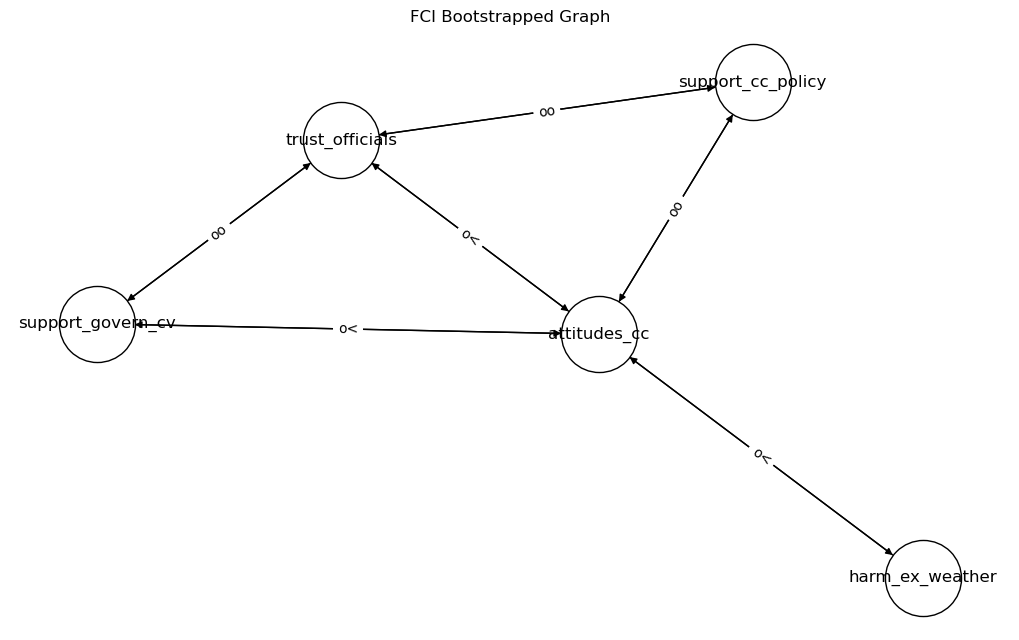

In [8]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(node_labels)

# Add edges with labels
for (source, target), label in final_edges.items():
    G.add_edge(source, target, label=label)

# Draw the graph
pos = nx.spring_layout(G, seed=67) 
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='white', edgecolors='black', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("FCI Bootstrapped Graph")
plt.show()


In [35]:
# Parameters
n_bootstraps = 1000
node_labels = ['support_cc_policy', 'attitudes_cc', 'support_govern_cv',
               'trust_officials', 'harm_ex_weather']
n_nodes = len(node_labels)

# Initialize edge count matrix 
edge_counts = np.zeros((n_nodes, n_nodes), dtype=int)

# Create alpha assignments (50/50)
alpha_assignments = np.array([0.01] * (n_bootstraps // 2) + [0.05] * (n_bootstraps // 2))
np.random.seed(42)
np.random.shuffle(alpha_assignments)

# Bootstrap loop 
for i in tqdm(range(n_bootstraps), desc="Bootstrapping PC"):
    alpha = alpha_assignments[i]
    sample = data.sample(n=len(data), replace=True, random_state=i)
    
    # Run PC on bootstrapped sample
    pc = PC(sample)
    pc_graph = pc.estimate(ci_test='pearsonr', return_type='cpdag', significance_level=alpha)

    # Update edge counts
    adj_matrix = nx.to_numpy_array(pc_graph, nodelist=node_labels, dtype=int)
    edge_counts += adj_matrix

Bootstrapping PC:   0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   0%|          | 1/1000 [00:00<05:10,  3.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   0%|          | 2/1000 [00:00<04:38,  3.58it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   0%|          | 3/1000 [00:00<04:12,  3.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   0%|          | 4/1000 [00:00<03:47,  4.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   0%|          | 5/1000 [00:01<03:09,  5.25it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|          | 6/1000 [00:01<03:12,  5.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|          | 7/1000 [00:01<03:09,  5.24it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|          | 8/1000 [00:01<03:25,  4.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|          | 9/1000 [00:01<03:20,  4.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|          | 10/1000 [00:02<02:54,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|          | 11/1000 [00:02<03:09,  5.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|          | 12/1000 [00:02<02:47,  5.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|▏         | 13/1000 [00:02<02:44,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   1%|▏         | 14/1000 [00:02<02:44,  6.01it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 15/1000 [00:02<02:46,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 16/1000 [00:03<02:45,  5.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 17/1000 [00:03<02:32,  6.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 18/1000 [00:03<02:27,  6.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 19/1000 [00:03<02:45,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 20/1000 [00:03<02:52,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 21/1000 [00:03<02:58,  5.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 22/1000 [00:04<02:58,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 23/1000 [00:04<02:49,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▏         | 24/1000 [00:04<02:56,  5.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   2%|▎         | 25/1000 [00:04<02:49,  5.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 26/1000 [00:04<02:44,  5.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 27/1000 [00:04<02:31,  6.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 28/1000 [00:05<02:48,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 29/1000 [00:05<02:37,  6.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 30/1000 [00:05<02:50,  5.70it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 31/1000 [00:05<02:33,  6.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 32/1000 [00:05<02:35,  6.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 33/1000 [00:05<02:39,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   3%|▎         | 34/1000 [00:06<02:47,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▎         | 35/1000 [00:06<02:37,  6.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▎         | 36/1000 [00:06<02:51,  5.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▎         | 37/1000 [00:06<03:08,  5.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▍         | 38/1000 [00:06<02:56,  5.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▍         | 39/1000 [00:07<02:53,  5.54it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▍         | 40/1000 [00:07<02:39,  6.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▍         | 41/1000 [00:07<02:31,  6.31it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▍         | 42/1000 [00:07<02:45,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▍         | 43/1000 [00:07<02:45,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▍         | 44/1000 [00:07<02:38,  6.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   4%|▍         | 45/1000 [00:07<02:32,  6.28it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▍         | 46/1000 [00:08<02:26,  6.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▍         | 47/1000 [00:08<02:16,  6.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▍         | 48/1000 [00:08<02:25,  6.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▍         | 49/1000 [00:08<02:35,  6.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▌         | 50/1000 [00:08<02:38,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▌         | 51/1000 [00:08<02:47,  5.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▌         | 52/1000 [00:09<03:01,  5.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▌         | 53/1000 [00:09<03:00,  5.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   5%|▌         | 54/1000 [00:09<02:49,  5.57it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▌         | 55/1000 [00:09<02:31,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▌         | 56/1000 [00:09<02:35,  6.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▌         | 57/1000 [00:09<02:37,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▌         | 58/1000 [00:10<02:49,  5.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▌         | 59/1000 [00:10<02:38,  5.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▌         | 60/1000 [00:10<02:37,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▌         | 61/1000 [00:10<02:34,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▌         | 62/1000 [00:10<02:34,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▋         | 63/1000 [00:10<02:20,  6.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▋         | 64/1000 [00:11<02:13,  7.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   6%|▋         | 65/1000 [00:11<02:30,  6.20it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 66/1000 [00:11<02:31,  6.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 67/1000 [00:11<02:38,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 68/1000 [00:11<02:49,  5.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 69/1000 [00:12<02:43,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 70/1000 [00:12<02:52,  5.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 71/1000 [00:12<02:40,  5.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 72/1000 [00:12<02:32,  6.10it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 73/1000 [00:12<02:29,  6.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   7%|▋         | 74/1000 [00:12<02:36,  5.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 75/1000 [00:13<02:40,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 76/1000 [00:13<02:39,  5.80it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 77/1000 [00:13<02:41,  5.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 78/1000 [00:13<02:28,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 79/1000 [00:13<02:33,  6.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 80/1000 [00:13<02:28,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 81/1000 [00:14<02:31,  6.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 82/1000 [00:14<02:26,  6.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 83/1000 [00:14<02:41,  5.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 84/1000 [00:14<02:53,  5.28it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   8%|▊         | 85/1000 [00:14<03:02,  5.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▊         | 86/1000 [00:14<02:59,  5.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▊         | 87/1000 [00:15<02:52,  5.29it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▉         | 88/1000 [00:15<02:45,  5.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▉         | 89/1000 [00:15<02:32,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▉         | 90/1000 [00:15<02:26,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▉         | 91/1000 [00:15<02:31,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▉         | 92/1000 [00:15<02:33,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▉         | 93/1000 [00:16<02:34,  5.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:   9%|▉         | 94/1000 [00:16<02:39,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|▉         | 95/1000 [00:16<02:31,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|▉         | 96/1000 [00:16<02:37,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|▉         | 97/1000 [00:16<02:25,  6.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|▉         | 98/1000 [00:16<02:13,  6.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|▉         | 99/1000 [00:17<02:14,  6.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|█         | 100/1000 [00:17<02:18,  6.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|█         | 101/1000 [00:17<02:18,  6.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|█         | 102/1000 [00:17<02:10,  6.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|█         | 103/1000 [00:17<02:10,  6.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|█         | 104/1000 [00:17<02:04,  7.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  10%|█         | 105/1000 [00:17<02:14,  6.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█         | 106/1000 [00:18<02:19,  6.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█         | 107/1000 [00:18<02:23,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█         | 108/1000 [00:18<02:29,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█         | 109/1000 [00:18<02:17,  6.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█         | 110/1000 [00:18<02:34,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█         | 111/1000 [00:19<02:51,  5.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█         | 112/1000 [00:19<03:01,  4.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█▏        | 113/1000 [00:19<02:53,  5.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  11%|█▏        | 114/1000 [00:19<02:45,  5.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 115/1000 [00:19<02:28,  5.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 116/1000 [00:19<02:19,  6.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 117/1000 [00:20<02:13,  6.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 118/1000 [00:20<02:20,  6.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 119/1000 [00:20<02:08,  6.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 120/1000 [00:20<02:16,  6.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 121/1000 [00:20<02:08,  6.86it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 122/1000 [00:20<02:04,  7.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 123/1000 [00:20<02:25,  6.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▏        | 124/1000 [00:21<02:12,  6.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  12%|█▎        | 125/1000 [00:21<02:14,  6.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 126/1000 [00:21<02:24,  6.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 127/1000 [00:21<02:31,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 128/1000 [00:21<02:25,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 129/1000 [00:21<02:20,  6.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 130/1000 [00:22<02:26,  5.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 131/1000 [00:22<02:41,  5.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 132/1000 [00:22<02:43,  5.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 133/1000 [00:22<02:25,  5.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  13%|█▎        | 134/1000 [00:22<02:29,  5.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▎        | 135/1000 [00:23<02:25,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▎        | 136/1000 [00:23<02:12,  6.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▎        | 137/1000 [00:23<02:30,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▍        | 138/1000 [00:23<02:39,  5.41it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▍        | 139/1000 [00:23<02:40,  5.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▍        | 140/1000 [00:23<02:18,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▍        | 141/1000 [00:24<02:24,  5.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▍        | 142/1000 [00:24<02:16,  6.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▍        | 143/1000 [00:24<02:24,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▍        | 144/1000 [00:24<02:26,  5.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  14%|█▍        | 145/1000 [00:24<02:43,  5.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▍        | 146/1000 [00:25<02:51,  4.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▍        | 147/1000 [00:25<02:45,  5.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▍        | 148/1000 [00:25<02:30,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▍        | 149/1000 [00:25<02:29,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▌        | 150/1000 [00:25<02:27,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▌        | 151/1000 [00:25<02:29,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▌        | 152/1000 [00:26<02:25,  5.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▌        | 153/1000 [00:26<02:23,  5.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  15%|█▌        | 154/1000 [00:26<02:19,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▌        | 155/1000 [00:26<02:16,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▌        | 156/1000 [00:26<02:12,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▌        | 157/1000 [00:26<02:33,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▌        | 158/1000 [00:27<02:34,  5.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▌        | 159/1000 [00:27<02:20,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▌        | 160/1000 [00:27<02:32,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▌        | 161/1000 [00:27<02:38,  5.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▌        | 162/1000 [00:27<02:29,  5.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▋        | 163/1000 [00:27<02:29,  5.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▋        | 164/1000 [00:28<02:42,  5.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  16%|█▋        | 165/1000 [00:28<02:31,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 166/1000 [00:28<02:30,  5.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 167/1000 [00:28<02:21,  5.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 168/1000 [00:28<02:21,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 169/1000 [00:28<02:21,  5.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 170/1000 [00:29<02:06,  6.54it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 171/1000 [00:29<01:56,  7.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 172/1000 [00:29<02:05,  6.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 173/1000 [00:29<02:01,  6.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  17%|█▋        | 174/1000 [00:29<02:18,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 175/1000 [00:29<02:17,  6.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 176/1000 [00:30<02:19,  5.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 177/1000 [00:30<02:22,  5.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 178/1000 [00:30<02:08,  6.42it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 179/1000 [00:30<02:15,  6.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 180/1000 [00:30<02:15,  6.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 181/1000 [00:30<02:17,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 182/1000 [00:31<02:17,  5.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 183/1000 [00:31<02:11,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 184/1000 [00:31<02:24,  5.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  18%|█▊        | 185/1000 [00:31<02:18,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▊        | 186/1000 [00:31<02:14,  6.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▊        | 187/1000 [00:31<02:21,  5.74it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▉        | 188/1000 [00:32<02:25,  5.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▉        | 189/1000 [00:32<02:30,  5.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▉        | 190/1000 [00:32<02:31,  5.36it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▉        | 191/1000 [00:32<02:18,  5.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▉        | 192/1000 [00:32<02:20,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▉        | 193/1000 [00:33<02:24,  5.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  19%|█▉        | 194/1000 [00:33<02:20,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|█▉        | 195/1000 [00:33<02:24,  5.58it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|█▉        | 196/1000 [00:33<02:15,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|█▉        | 197/1000 [00:33<02:02,  6.58it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|█▉        | 198/1000 [00:33<01:53,  7.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|█▉        | 199/1000 [00:33<02:01,  6.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|██        | 200/1000 [00:34<02:02,  6.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|██        | 201/1000 [00:34<02:15,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|██        | 202/1000 [00:34<02:25,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|██        | 203/1000 [00:34<02:16,  5.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|██        | 204/1000 [00:34<02:13,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  20%|██        | 205/1000 [00:34<02:21,  5.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██        | 206/1000 [00:35<02:26,  5.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██        | 207/1000 [00:35<02:35,  5.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██        | 208/1000 [00:35<02:43,  4.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██        | 209/1000 [00:35<02:28,  5.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██        | 210/1000 [00:36<02:36,  5.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██        | 211/1000 [00:36<02:16,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██        | 212/1000 [00:36<02:12,  5.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██▏       | 213/1000 [00:36<02:27,  5.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  21%|██▏       | 214/1000 [00:36<02:23,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 215/1000 [00:36<02:17,  5.70it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 216/1000 [00:37<02:16,  5.74it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 217/1000 [00:37<02:12,  5.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 218/1000 [00:37<02:01,  6.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 219/1000 [00:37<02:10,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 220/1000 [00:37<02:22,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 221/1000 [00:37<02:18,  5.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 222/1000 [00:38<02:07,  6.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 223/1000 [00:38<02:20,  5.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▏       | 224/1000 [00:38<02:09,  6.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  22%|██▎       | 225/1000 [00:38<02:10,  5.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 226/1000 [00:38<01:56,  6.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 227/1000 [00:38<02:06,  6.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 228/1000 [00:38<01:54,  6.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 229/1000 [00:39<02:14,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 230/1000 [00:39<02:11,  5.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 231/1000 [00:39<02:12,  5.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 232/1000 [00:39<02:02,  6.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 233/1000 [00:39<02:15,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  23%|██▎       | 234/1000 [00:40<02:18,  5.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▎       | 235/1000 [00:40<02:07,  6.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▎       | 236/1000 [00:40<02:04,  6.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▎       | 237/1000 [00:40<02:17,  5.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▍       | 238/1000 [00:40<02:27,  5.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▍       | 239/1000 [00:41<02:35,  4.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▍       | 240/1000 [00:41<02:19,  5.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▍       | 241/1000 [00:41<02:05,  6.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▍       | 242/1000 [00:41<01:55,  6.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▍       | 243/1000 [00:41<01:59,  6.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▍       | 244/1000 [00:41<01:58,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  24%|██▍       | 245/1000 [00:41<02:02,  6.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▍       | 246/1000 [00:42<02:07,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▍       | 247/1000 [00:42<02:09,  5.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▍       | 248/1000 [00:42<02:01,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▍       | 249/1000 [00:42<01:57,  6.41it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▌       | 250/1000 [00:42<01:57,  6.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▌       | 251/1000 [00:42<01:57,  6.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▌       | 252/1000 [00:43<02:12,  5.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▌       | 253/1000 [00:43<02:22,  5.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  25%|██▌       | 254/1000 [00:43<02:29,  4.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▌       | 255/1000 [00:43<02:23,  5.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▌       | 256/1000 [00:43<02:12,  5.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▌       | 257/1000 [00:44<02:07,  5.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▌       | 258/1000 [00:44<02:05,  5.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▌       | 259/1000 [00:44<02:02,  6.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▌       | 260/1000 [00:44<02:04,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▌       | 261/1000 [00:44<02:09,  5.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▌       | 262/1000 [00:44<02:00,  6.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▋       | 263/1000 [00:44<01:53,  6.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▋       | 264/1000 [00:45<01:50,  6.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  26%|██▋       | 265/1000 [00:45<01:46,  6.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 266/1000 [00:45<01:43,  7.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 267/1000 [00:45<01:44,  7.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 268/1000 [00:45<01:52,  6.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 269/1000 [00:45<01:56,  6.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 270/1000 [00:45<01:48,  6.74it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 271/1000 [00:46<01:54,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 272/1000 [00:46<02:02,  5.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 273/1000 [00:46<02:13,  5.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  27%|██▋       | 274/1000 [00:46<02:04,  5.81it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 275/1000 [00:46<02:00,  6.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 276/1000 [00:47<02:00,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 277/1000 [00:47<02:05,  5.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 278/1000 [00:47<01:59,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 279/1000 [00:47<02:12,  5.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 280/1000 [00:47<02:04,  5.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 281/1000 [00:47<02:09,  5.54it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 282/1000 [00:48<02:23,  5.01it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 283/1000 [00:48<02:14,  5.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 284/1000 [00:48<02:11,  5.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  28%|██▊       | 285/1000 [00:48<02:06,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▊       | 286/1000 [00:48<02:11,  5.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▊       | 287/1000 [00:49<02:01,  5.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▉       | 288/1000 [00:49<01:55,  6.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▉       | 289/1000 [00:49<01:46,  6.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▉       | 290/1000 [00:49<01:53,  6.28it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▉       | 291/1000 [00:49<02:05,  5.66it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▉       | 292/1000 [00:49<02:13,  5.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▉       | 293/1000 [00:50<02:11,  5.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  29%|██▉       | 294/1000 [00:50<02:02,  5.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|██▉       | 295/1000 [00:50<01:56,  6.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|██▉       | 296/1000 [00:50<02:07,  5.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|██▉       | 297/1000 [00:50<02:06,  5.57it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|██▉       | 298/1000 [00:50<02:13,  5.25it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|██▉       | 299/1000 [00:51<02:13,  5.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|███       | 300/1000 [00:51<01:58,  5.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|███       | 301/1000 [00:51<01:55,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|███       | 302/1000 [00:51<01:58,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|███       | 303/1000 [00:51<01:48,  6.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|███       | 304/1000 [00:51<01:41,  6.86it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  30%|███       | 305/1000 [00:52<01:49,  6.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███       | 306/1000 [00:52<01:53,  6.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███       | 307/1000 [00:52<01:48,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███       | 308/1000 [00:52<02:01,  5.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███       | 309/1000 [00:52<01:58,  5.81it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███       | 310/1000 [00:52<02:00,  5.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███       | 311/1000 [00:53<01:58,  5.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███       | 312/1000 [00:53<01:49,  6.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███▏      | 313/1000 [00:53<01:49,  6.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  31%|███▏      | 314/1000 [00:53<01:55,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 315/1000 [00:53<01:54,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 316/1000 [00:53<01:55,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 317/1000 [00:54<01:56,  5.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 318/1000 [00:54<01:43,  6.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 319/1000 [00:54<01:39,  6.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 320/1000 [00:54<01:32,  7.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 321/1000 [00:54<01:35,  7.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 322/1000 [00:54<01:41,  6.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 323/1000 [00:54<01:49,  6.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▏      | 324/1000 [00:55<01:58,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  32%|███▎      | 325/1000 [00:55<01:58,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 326/1000 [00:55<02:00,  5.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 327/1000 [00:55<01:56,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 328/1000 [00:55<01:47,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 329/1000 [00:56<02:04,  5.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 330/1000 [00:56<02:01,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 331/1000 [00:56<01:55,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 332/1000 [00:56<01:45,  6.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 333/1000 [00:56<01:51,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  33%|███▎      | 334/1000 [00:56<01:58,  5.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▎      | 335/1000 [00:57<01:56,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▎      | 336/1000 [00:57<01:54,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▎      | 337/1000 [00:57<01:55,  5.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▍      | 338/1000 [00:57<01:56,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▍      | 339/1000 [00:57<02:05,  5.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▍      | 340/1000 [00:58<02:06,  5.24it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▍      | 341/1000 [00:58<01:54,  5.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▍      | 342/1000 [00:58<01:56,  5.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▍      | 343/1000 [00:58<01:49,  6.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▍      | 344/1000 [00:58<01:39,  6.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  34%|███▍      | 345/1000 [00:58<01:35,  6.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▍      | 346/1000 [00:58<01:46,  6.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▍      | 347/1000 [00:59<01:47,  6.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▍      | 348/1000 [00:59<01:50,  5.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▍      | 349/1000 [00:59<01:45,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▌      | 350/1000 [00:59<02:02,  5.31it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▌      | 351/1000 [00:59<01:49,  5.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▌      | 352/1000 [00:59<01:52,  5.74it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▌      | 353/1000 [01:00<01:52,  5.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  35%|███▌      | 354/1000 [01:00<01:43,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▌      | 355/1000 [01:00<01:35,  6.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▌      | 356/1000 [01:00<01:30,  7.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▌      | 357/1000 [01:00<01:38,  6.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▌      | 358/1000 [01:00<01:32,  6.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▌      | 359/1000 [01:00<01:35,  6.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▌      | 360/1000 [01:01<01:45,  6.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▌      | 361/1000 [01:01<01:41,  6.28it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▌      | 362/1000 [01:01<01:47,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▋      | 363/1000 [01:01<01:37,  6.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▋      | 364/1000 [01:01<01:31,  6.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  36%|███▋      | 365/1000 [01:01<01:27,  7.24it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 366/1000 [01:02<01:44,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 367/1000 [01:02<01:38,  6.41it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 368/1000 [01:02<01:46,  5.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 369/1000 [01:02<01:36,  6.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 370/1000 [01:02<01:45,  5.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 371/1000 [01:02<01:38,  6.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 372/1000 [01:03<01:45,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 373/1000 [01:03<01:41,  6.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  37%|███▋      | 374/1000 [01:03<01:48,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 375/1000 [01:03<01:38,  6.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 376/1000 [01:03<01:53,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 377/1000 [01:03<01:50,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 378/1000 [01:04<01:45,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 379/1000 [01:04<02:41,  3.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 380/1000 [01:04<02:25,  4.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 381/1000 [01:04<02:06,  4.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 382/1000 [01:05<02:02,  5.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 383/1000 [01:05<01:47,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 384/1000 [01:05<01:45,  5.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  38%|███▊      | 385/1000 [01:05<01:43,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▊      | 386/1000 [01:05<01:41,  6.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▊      | 387/1000 [01:05<01:50,  5.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▉      | 388/1000 [01:06<01:53,  5.39it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▉      | 389/1000 [01:06<01:48,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▉      | 390/1000 [01:06<01:41,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▉      | 391/1000 [01:06<01:40,  6.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▉      | 392/1000 [01:06<01:32,  6.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▉      | 393/1000 [01:06<01:46,  5.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  39%|███▉      | 394/1000 [01:07<01:43,  5.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|███▉      | 395/1000 [01:07<01:37,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|███▉      | 396/1000 [01:07<01:42,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|███▉      | 397/1000 [01:07<01:43,  5.80it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|███▉      | 398/1000 [01:07<01:41,  5.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|███▉      | 399/1000 [01:07<01:40,  5.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|████      | 400/1000 [01:08<01:37,  6.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|████      | 401/1000 [01:08<01:41,  5.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|████      | 402/1000 [01:08<01:43,  5.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|████      | 403/1000 [01:08<01:45,  5.66it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|████      | 404/1000 [01:08<01:39,  5.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  40%|████      | 405/1000 [01:08<01:39,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████      | 406/1000 [01:09<01:44,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████      | 407/1000 [01:09<01:40,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████      | 408/1000 [01:09<01:36,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████      | 409/1000 [01:09<01:33,  6.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████      | 410/1000 [01:09<01:31,  6.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████      | 411/1000 [01:09<01:30,  6.48it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████      | 412/1000 [01:10<01:26,  6.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████▏     | 413/1000 [01:10<01:30,  6.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  41%|████▏     | 414/1000 [01:10<01:33,  6.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 415/1000 [01:10<01:36,  6.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 416/1000 [01:10<01:37,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 417/1000 [01:10<01:41,  5.74it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 418/1000 [01:11<01:40,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 419/1000 [01:11<01:47,  5.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 420/1000 [01:11<01:46,  5.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 421/1000 [01:11<01:58,  4.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 422/1000 [01:11<01:58,  4.86it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 423/1000 [01:12<01:54,  5.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▏     | 424/1000 [01:12<01:58,  4.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  42%|████▎     | 425/1000 [01:12<01:44,  5.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 426/1000 [01:12<01:42,  5.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 427/1000 [01:12<01:32,  6.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 428/1000 [01:12<01:30,  6.29it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 429/1000 [01:13<01:37,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 430/1000 [01:13<01:38,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 431/1000 [01:13<01:35,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 432/1000 [01:13<01:45,  5.36it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 433/1000 [01:13<01:34,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  43%|████▎     | 434/1000 [01:13<01:30,  6.28it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▎     | 435/1000 [01:14<01:26,  6.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▎     | 436/1000 [01:14<01:36,  5.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▎     | 437/1000 [01:14<01:32,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▍     | 438/1000 [01:14<01:26,  6.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▍     | 439/1000 [01:14<01:38,  5.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▍     | 440/1000 [01:14<01:44,  5.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▍     | 441/1000 [01:15<02:02,  4.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▍     | 442/1000 [01:15<01:58,  4.70it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▍     | 443/1000 [01:15<02:00,  4.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▍     | 444/1000 [01:15<02:01,  4.58it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  44%|████▍     | 445/1000 [01:16<02:00,  4.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▍     | 446/1000 [01:16<02:02,  4.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▍     | 447/1000 [01:16<01:48,  5.10it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▍     | 448/1000 [01:16<01:39,  5.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▍     | 449/1000 [01:16<01:43,  5.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▌     | 450/1000 [01:17<01:51,  4.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▌     | 451/1000 [01:17<01:52,  4.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▌     | 452/1000 [01:17<01:57,  4.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▌     | 453/1000 [01:17<01:51,  4.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  45%|████▌     | 454/1000 [01:17<01:44,  5.25it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▌     | 455/1000 [01:18<01:35,  5.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▌     | 456/1000 [01:18<01:36,  5.62it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▌     | 457/1000 [01:18<01:41,  5.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▌     | 458/1000 [01:18<01:44,  5.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▌     | 459/1000 [01:18<01:47,  5.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▌     | 460/1000 [01:19<01:51,  4.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▌     | 461/1000 [01:19<01:45,  5.10it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▌     | 462/1000 [01:19<01:38,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▋     | 463/1000 [01:19<01:35,  5.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▋     | 464/1000 [01:19<01:28,  6.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  46%|████▋     | 465/1000 [01:19<01:24,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 466/1000 [01:19<01:26,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 467/1000 [01:20<01:27,  6.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 468/1000 [01:20<01:22,  6.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 469/1000 [01:20<01:24,  6.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 470/1000 [01:20<01:25,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 471/1000 [01:20<01:26,  6.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 472/1000 [01:20<01:22,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 473/1000 [01:21<01:25,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  47%|████▋     | 474/1000 [01:21<01:21,  6.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 475/1000 [01:21<01:22,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 476/1000 [01:21<01:24,  6.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 477/1000 [01:21<01:25,  6.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 478/1000 [01:21<01:23,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 479/1000 [01:22<01:16,  6.80it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 480/1000 [01:22<01:29,  5.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 481/1000 [01:22<01:22,  6.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 482/1000 [01:22<01:20,  6.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 483/1000 [01:22<01:24,  6.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 484/1000 [01:22<01:27,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  48%|████▊     | 485/1000 [01:23<01:32,  5.58it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▊     | 486/1000 [01:23<01:30,  5.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▊     | 487/1000 [01:23<01:32,  5.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▉     | 488/1000 [01:23<01:30,  5.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▉     | 489/1000 [01:23<01:22,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▉     | 490/1000 [01:23<01:20,  6.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▉     | 491/1000 [01:24<01:29,  5.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▉     | 492/1000 [01:24<01:24,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▉     | 493/1000 [01:24<01:31,  5.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  49%|████▉     | 494/1000 [01:24<01:22,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|████▉     | 495/1000 [01:24<01:20,  6.29it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|████▉     | 496/1000 [01:24<01:26,  5.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|████▉     | 497/1000 [01:25<01:21,  6.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|████▉     | 498/1000 [01:25<01:23,  6.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|████▉     | 499/1000 [01:25<01:17,  6.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|█████     | 500/1000 [01:25<01:16,  6.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|█████     | 501/1000 [01:25<01:14,  6.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|█████     | 502/1000 [01:25<01:11,  6.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|█████     | 503/1000 [01:25<01:13,  6.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|█████     | 504/1000 [01:26<01:20,  6.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  50%|█████     | 505/1000 [01:26<01:23,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████     | 506/1000 [01:26<01:32,  5.36it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████     | 507/1000 [01:26<01:36,  5.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████     | 508/1000 [01:26<01:34,  5.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████     | 509/1000 [01:27<01:32,  5.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████     | 510/1000 [01:27<01:41,  4.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████     | 511/1000 [01:27<01:41,  4.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████     | 512/1000 [01:27<01:36,  5.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████▏    | 513/1000 [01:27<01:31,  5.31it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  51%|█████▏    | 514/1000 [01:28<01:22,  5.86it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 515/1000 [01:28<01:20,  6.01it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 516/1000 [01:28<01:18,  6.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 517/1000 [01:28<01:14,  6.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 518/1000 [01:28<01:15,  6.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 519/1000 [01:28<01:18,  6.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 520/1000 [01:29<01:21,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 521/1000 [01:29<01:17,  6.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 522/1000 [01:29<01:21,  5.86it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 523/1000 [01:29<01:23,  5.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▏    | 524/1000 [01:29<01:29,  5.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  52%|█████▎    | 525/1000 [01:29<01:24,  5.62it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 526/1000 [01:30<01:15,  6.28it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 527/1000 [01:30<01:13,  6.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 528/1000 [01:30<01:17,  6.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 529/1000 [01:30<01:17,  6.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 530/1000 [01:30<01:19,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 531/1000 [01:30<01:26,  5.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 532/1000 [01:31<01:25,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 533/1000 [01:31<01:23,  5.57it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  53%|█████▎    | 534/1000 [01:31<01:24,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▎    | 535/1000 [01:31<01:19,  5.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▎    | 536/1000 [01:31<01:16,  6.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▎    | 537/1000 [01:31<01:13,  6.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▍    | 538/1000 [01:32<01:08,  6.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▍    | 539/1000 [01:32<01:12,  6.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▍    | 540/1000 [01:32<01:14,  6.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▍    | 541/1000 [01:32<01:10,  6.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▍    | 542/1000 [01:32<01:06,  6.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▍    | 543/1000 [01:32<01:17,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  54%|█████▍    | 544/1000 [01:33<01:21,  5.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▍    | 545/1000 [01:33<01:17,  5.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▍    | 546/1000 [01:33<01:11,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▍    | 547/1000 [01:33<01:13,  6.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▍    | 548/1000 [01:33<01:18,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▍    | 549/1000 [01:33<01:12,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▌    | 550/1000 [01:34<01:17,  5.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▌    | 551/1000 [01:34<01:09,  6.42it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▌    | 552/1000 [01:34<01:19,  5.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▌    | 553/1000 [01:34<01:24,  5.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  55%|█████▌    | 554/1000 [01:34<01:14,  6.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▌    | 555/1000 [01:34<01:22,  5.39it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▌    | 556/1000 [01:35<01:22,  5.39it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▌    | 557/1000 [01:35<01:16,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▌    | 558/1000 [01:35<01:18,  5.66it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▌    | 559/1000 [01:35<01:15,  5.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▌    | 560/1000 [01:35<01:12,  6.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▌    | 561/1000 [01:36<01:19,  5.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▌    | 562/1000 [01:36<01:17,  5.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▋    | 563/1000 [01:36<01:15,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▋    | 564/1000 [01:36<01:22,  5.28it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  56%|█████▋    | 565/1000 [01:36<01:14,  5.86it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 566/1000 [01:36<01:08,  6.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 567/1000 [01:37<01:11,  6.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 568/1000 [01:37<01:10,  6.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 569/1000 [01:37<01:07,  6.39it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 570/1000 [01:37<01:07,  6.36it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 571/1000 [01:37<01:02,  6.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 572/1000 [01:37<01:00,  7.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 573/1000 [01:37<01:11,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▋    | 574/1000 [01:38<01:08,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  57%|█████▊    | 575/1000 [01:38<01:05,  6.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 576/1000 [01:38<01:03,  6.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 577/1000 [01:38<01:01,  6.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 578/1000 [01:38<00:57,  7.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 579/1000 [01:38<01:03,  6.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 580/1000 [01:39<01:08,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 581/1000 [01:39<01:03,  6.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 582/1000 [01:39<01:01,  6.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 583/1000 [01:39<01:07,  6.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 584/1000 [01:39<01:11,  5.81it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  58%|█████▊    | 585/1000 [01:39<01:12,  5.70it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▊    | 586/1000 [01:39<01:06,  6.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▊    | 587/1000 [01:40<01:07,  6.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▉    | 588/1000 [01:40<01:14,  5.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▉    | 589/1000 [01:40<01:19,  5.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▉    | 590/1000 [01:40<01:20,  5.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▉    | 591/1000 [01:40<01:08,  5.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▉    | 592/1000 [01:41<01:16,  5.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▉    | 593/1000 [01:41<01:15,  5.36it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  59%|█████▉    | 594/1000 [01:41<01:15,  5.41it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|█████▉    | 595/1000 [01:41<01:15,  5.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|█████▉    | 596/1000 [01:41<01:13,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|█████▉    | 597/1000 [01:42<01:12,  5.58it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|█████▉    | 598/1000 [01:42<01:10,  5.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|█████▉    | 599/1000 [01:42<01:08,  5.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|██████    | 600/1000 [01:42<01:07,  5.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|██████    | 601/1000 [01:42<01:07,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|██████    | 602/1000 [01:42<01:00,  6.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|██████    | 603/1000 [01:43<01:05,  6.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|██████    | 604/1000 [01:43<01:07,  5.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  60%|██████    | 605/1000 [01:43<01:07,  5.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████    | 606/1000 [01:43<01:03,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████    | 607/1000 [01:43<01:00,  6.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████    | 608/1000 [01:43<00:56,  6.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████    | 609/1000 [01:43<00:59,  6.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████    | 610/1000 [01:44<01:08,  5.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████    | 611/1000 [01:44<01:02,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████    | 612/1000 [01:44<00:58,  6.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████▏   | 613/1000 [01:44<01:07,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  61%|██████▏   | 614/1000 [01:44<01:04,  5.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 615/1000 [01:44<01:08,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 616/1000 [01:45<01:15,  5.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 617/1000 [01:45<01:17,  4.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 618/1000 [01:45<01:18,  4.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 619/1000 [01:45<01:12,  5.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 620/1000 [01:45<01:09,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 621/1000 [01:46<01:08,  5.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 622/1000 [01:46<01:05,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 623/1000 [01:46<01:10,  5.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▏   | 624/1000 [01:46<01:03,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  62%|██████▎   | 625/1000 [01:46<01:02,  5.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 626/1000 [01:46<00:59,  6.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 627/1000 [01:47<01:01,  6.10it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 628/1000 [01:47<01:09,  5.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 629/1000 [01:47<01:13,  5.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 630/1000 [01:47<01:09,  5.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 631/1000 [01:47<01:03,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 632/1000 [01:48<01:04,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 633/1000 [01:48<01:04,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  63%|██████▎   | 634/1000 [01:48<01:04,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▎   | 635/1000 [01:48<00:58,  6.23it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▎   | 636/1000 [01:48<01:04,  5.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▎   | 637/1000 [01:48<01:01,  5.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▍   | 638/1000 [01:49<01:02,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▍   | 639/1000 [01:49<00:58,  6.20it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▍   | 640/1000 [01:49<01:05,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▍   | 641/1000 [01:49<01:02,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▍   | 642/1000 [01:49<01:00,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▍   | 643/1000 [01:49<00:57,  6.20it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▍   | 644/1000 [01:50<00:56,  6.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  64%|██████▍   | 645/1000 [01:50<00:50,  7.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▍   | 646/1000 [01:50<00:47,  7.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▍   | 647/1000 [01:50<00:52,  6.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▍   | 648/1000 [01:50<00:53,  6.54it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▍   | 649/1000 [01:50<00:57,  6.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▌   | 650/1000 [01:51<01:00,  5.78it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▌   | 651/1000 [01:51<00:56,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▌   | 652/1000 [01:51<00:59,  5.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▌   | 653/1000 [01:51<00:55,  6.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  65%|██████▌   | 654/1000 [01:51<00:58,  5.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▌   | 655/1000 [01:51<01:07,  5.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▌   | 656/1000 [01:52<01:10,  4.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▌   | 657/1000 [01:52<01:08,  4.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▌   | 658/1000 [01:52<01:09,  4.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▌   | 659/1000 [01:52<01:09,  4.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▌   | 660/1000 [01:52<01:04,  5.24it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▌   | 661/1000 [01:53<01:01,  5.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▌   | 662/1000 [01:53<01:01,  5.48it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▋   | 663/1000 [01:53<01:07,  5.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▋   | 664/1000 [01:53<01:09,  4.86it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  66%|██████▋   | 665/1000 [01:53<00:59,  5.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 666/1000 [01:53<00:55,  6.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 667/1000 [01:54<00:56,  5.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 668/1000 [01:54<00:55,  6.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 669/1000 [01:54<00:54,  6.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 670/1000 [01:54<00:55,  5.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 671/1000 [01:54<01:00,  5.45it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 672/1000 [01:55<00:59,  5.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 673/1000 [01:55<00:57,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  67%|██████▋   | 674/1000 [01:55<00:59,  5.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 675/1000 [01:55<00:55,  5.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 676/1000 [01:55<00:49,  6.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 677/1000 [01:55<00:45,  7.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 678/1000 [01:56<00:52,  6.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 679/1000 [01:56<00:52,  6.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 680/1000 [01:56<00:56,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 681/1000 [01:56<00:57,  5.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 682/1000 [01:56<00:53,  5.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 683/1000 [01:56<00:50,  6.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 684/1000 [01:56<00:46,  6.74it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  68%|██████▊   | 685/1000 [01:57<00:54,  5.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▊   | 686/1000 [01:57<00:51,  6.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▊   | 687/1000 [01:57<00:51,  6.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▉   | 688/1000 [01:57<00:51,  6.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▉   | 689/1000 [01:57<00:46,  6.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▉   | 690/1000 [01:57<00:45,  6.88it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▉   | 691/1000 [01:58<00:49,  6.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▉   | 692/1000 [01:58<00:53,  5.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▉   | 693/1000 [01:58<00:53,  5.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  69%|██████▉   | 694/1000 [01:58<00:52,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|██████▉   | 695/1000 [01:58<00:49,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|██████▉   | 696/1000 [01:58<00:43,  6.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|██████▉   | 697/1000 [01:59<00:51,  5.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|██████▉   | 698/1000 [01:59<00:49,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|██████▉   | 699/1000 [01:59<00:48,  6.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|███████   | 700/1000 [01:59<00:50,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|███████   | 701/1000 [01:59<00:47,  6.24it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|███████   | 702/1000 [01:59<00:52,  5.66it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|███████   | 703/1000 [02:00<00:54,  5.45it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|███████   | 704/1000 [02:00<00:50,  5.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  70%|███████   | 705/1000 [02:00<00:54,  5.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████   | 706/1000 [02:00<00:58,  5.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████   | 707/1000 [02:00<00:58,  5.01it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████   | 708/1000 [02:01<00:54,  5.31it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████   | 709/1000 [02:01<00:56,  5.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████   | 710/1000 [02:01<00:57,  5.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████   | 711/1000 [02:01<01:00,  4.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████   | 712/1000 [02:02<01:01,  4.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████▏  | 713/1000 [02:02<00:58,  4.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  71%|███████▏  | 714/1000 [02:02<00:53,  5.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 715/1000 [02:02<00:56,  5.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 716/1000 [02:02<00:54,  5.24it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 717/1000 [02:02<00:51,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 718/1000 [02:03<00:55,  5.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 719/1000 [02:03<00:54,  5.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 720/1000 [02:03<00:52,  5.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 721/1000 [02:03<00:48,  5.71it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 722/1000 [02:03<00:44,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 723/1000 [02:03<00:49,  5.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▏  | 724/1000 [02:04<00:50,  5.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  72%|███████▎  | 725/1000 [02:04<00:49,  5.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 726/1000 [02:04<00:47,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 727/1000 [02:04<00:44,  6.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 728/1000 [02:04<00:42,  6.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 729/1000 [02:04<00:44,  6.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 730/1000 [02:05<00:43,  6.20it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 731/1000 [02:05<00:44,  6.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 732/1000 [02:05<00:46,  5.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 733/1000 [02:05<00:50,  5.29it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  73%|███████▎  | 734/1000 [02:05<00:49,  5.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▎  | 735/1000 [02:06<00:51,  5.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▎  | 736/1000 [02:06<00:50,  5.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▎  | 737/1000 [02:06<00:48,  5.42it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▍  | 738/1000 [02:06<00:44,  5.91it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▍  | 739/1000 [02:06<00:48,  5.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▍  | 740/1000 [02:07<00:47,  5.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▍  | 741/1000 [02:07<00:48,  5.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▍  | 742/1000 [02:07<00:46,  5.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▍  | 743/1000 [02:07<00:50,  5.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▍  | 744/1000 [02:07<00:49,  5.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  74%|███████▍  | 745/1000 [02:07<00:47,  5.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▍  | 746/1000 [02:08<00:44,  5.66it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▍  | 747/1000 [02:08<00:49,  5.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▍  | 748/1000 [02:08<00:44,  5.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▍  | 749/1000 [02:08<00:45,  5.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▌  | 750/1000 [02:08<00:47,  5.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▌  | 751/1000 [02:09<00:45,  5.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▌  | 752/1000 [02:09<00:46,  5.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▌  | 753/1000 [02:09<00:48,  5.07it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  75%|███████▌  | 754/1000 [02:09<00:47,  5.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▌  | 755/1000 [02:09<00:49,  4.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▌  | 756/1000 [02:10<00:47,  5.15it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▌  | 757/1000 [02:10<00:49,  4.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▌  | 758/1000 [02:10<00:48,  4.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▌  | 759/1000 [02:10<00:45,  5.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▌  | 760/1000 [02:10<00:40,  5.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▌  | 761/1000 [02:10<00:37,  6.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▌  | 762/1000 [02:11<00:37,  6.42it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▋  | 763/1000 [02:11<00:34,  6.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▋  | 764/1000 [02:11<00:35,  6.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  76%|███████▋  | 765/1000 [02:11<00:38,  6.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 766/1000 [02:11<00:37,  6.25it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 767/1000 [02:11<00:36,  6.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 768/1000 [02:11<00:36,  6.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 769/1000 [02:12<00:34,  6.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 770/1000 [02:12<00:33,  6.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 771/1000 [02:12<00:34,  6.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 772/1000 [02:12<00:32,  7.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 773/1000 [02:12<00:32,  7.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  77%|███████▋  | 774/1000 [02:12<00:34,  6.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 775/1000 [02:12<00:33,  6.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 776/1000 [02:13<00:36,  6.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 777/1000 [02:13<00:41,  5.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 778/1000 [02:13<00:40,  5.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 779/1000 [02:13<00:40,  5.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 780/1000 [02:13<00:39,  5.62it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 781/1000 [02:14<00:41,  5.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 782/1000 [02:14<00:39,  5.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 783/1000 [02:14<00:37,  5.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 784/1000 [02:14<00:32,  6.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  78%|███████▊  | 785/1000 [02:14<00:30,  6.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▊  | 786/1000 [02:14<00:31,  6.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▊  | 787/1000 [02:15<00:31,  6.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▉  | 788/1000 [02:15<00:35,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▉  | 789/1000 [02:15<00:37,  5.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▉  | 790/1000 [02:15<00:33,  6.29it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▉  | 791/1000 [02:15<00:38,  5.46it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▉  | 792/1000 [02:15<00:37,  5.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▉  | 793/1000 [02:16<00:38,  5.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  79%|███████▉  | 794/1000 [02:16<00:36,  5.62it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|███████▉  | 795/1000 [02:16<00:39,  5.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|███████▉  | 796/1000 [02:16<00:36,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|███████▉  | 797/1000 [02:16<00:37,  5.43it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|███████▉  | 798/1000 [02:17<00:36,  5.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|███████▉  | 799/1000 [02:17<00:38,  5.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|████████  | 800/1000 [02:17<00:38,  5.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|████████  | 801/1000 [02:17<00:37,  5.24it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|████████  | 802/1000 [02:17<00:35,  5.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|████████  | 803/1000 [02:18<00:36,  5.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|████████  | 804/1000 [02:18<00:39,  4.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  80%|████████  | 805/1000 [02:18<00:38,  5.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████  | 806/1000 [02:18<00:35,  5.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████  | 807/1000 [02:18<00:34,  5.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████  | 808/1000 [02:18<00:33,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████  | 809/1000 [02:19<00:31,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████  | 810/1000 [02:19<00:31,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████  | 811/1000 [02:19<00:33,  5.67it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████  | 812/1000 [02:19<00:32,  5.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████▏ | 813/1000 [02:19<00:33,  5.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  81%|████████▏ | 814/1000 [02:20<00:35,  5.30it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 815/1000 [02:20<00:35,  5.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 816/1000 [02:20<00:34,  5.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 817/1000 [02:20<00:37,  4.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 818/1000 [02:20<00:38,  4.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 819/1000 [02:21<00:36,  5.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 820/1000 [02:21<00:33,  5.31it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 821/1000 [02:21<00:32,  5.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 822/1000 [02:21<00:32,  5.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 823/1000 [02:21<00:35,  4.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▏ | 824/1000 [02:21<00:35,  4.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  82%|████████▎ | 825/1000 [02:22<00:31,  5.53it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 826/1000 [02:22<00:33,  5.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 827/1000 [02:22<00:35,  4.92it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 828/1000 [02:22<00:32,  5.33it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 829/1000 [02:22<00:29,  5.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 830/1000 [02:23<00:30,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 831/1000 [02:23<00:28,  5.86it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 832/1000 [02:23<00:31,  5.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 833/1000 [02:23<00:30,  5.45it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  83%|████████▎ | 834/1000 [02:23<00:29,  5.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▎ | 835/1000 [02:23<00:29,  5.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▎ | 836/1000 [02:24<00:32,  5.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▎ | 837/1000 [02:24<00:31,  5.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▍ | 838/1000 [02:24<00:31,  5.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▍ | 839/1000 [02:24<00:33,  4.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▍ | 840/1000 [02:24<00:31,  5.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▍ | 841/1000 [02:25<00:32,  4.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▍ | 842/1000 [02:25<00:31,  5.09it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▍ | 843/1000 [02:25<00:33,  4.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▍ | 844/1000 [02:25<00:30,  5.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  84%|████████▍ | 845/1000 [02:25<00:30,  5.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▍ | 846/1000 [02:26<00:31,  4.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▍ | 847/1000 [02:26<00:30,  5.10it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▍ | 848/1000 [02:26<00:27,  5.62it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▍ | 849/1000 [02:26<00:25,  5.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▌ | 850/1000 [02:26<00:23,  6.48it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▌ | 851/1000 [02:26<00:24,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▌ | 852/1000 [02:27<00:25,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▌ | 853/1000 [02:27<00:25,  5.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  85%|████████▌ | 854/1000 [02:27<00:27,  5.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▌ | 855/1000 [02:27<00:25,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▌ | 856/1000 [02:27<00:24,  5.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▌ | 857/1000 [02:28<00:24,  5.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▌ | 858/1000 [02:28<00:24,  5.72it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▌ | 859/1000 [02:28<00:24,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▌ | 860/1000 [02:28<00:26,  5.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▌ | 861/1000 [02:28<00:25,  5.39it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▌ | 862/1000 [02:28<00:24,  5.62it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▋ | 863/1000 [02:29<00:23,  5.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▋ | 864/1000 [02:29<00:25,  5.42it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  86%|████████▋ | 865/1000 [02:29<00:24,  5.54it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 866/1000 [02:29<00:23,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 867/1000 [02:29<00:21,  6.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 868/1000 [02:29<00:20,  6.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 869/1000 [02:30<00:19,  6.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 870/1000 [02:30<00:17,  7.45it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 871/1000 [02:30<00:18,  7.13it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 872/1000 [02:30<00:18,  6.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 873/1000 [02:30<00:19,  6.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  87%|████████▋ | 874/1000 [02:30<00:20,  6.03it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 875/1000 [02:31<00:23,  5.39it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 876/1000 [02:31<00:23,  5.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 877/1000 [02:31<00:20,  5.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 878/1000 [02:31<00:22,  5.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 879/1000 [02:31<00:22,  5.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 880/1000 [02:31<00:21,  5.57it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 881/1000 [02:32<00:21,  5.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 882/1000 [02:32<00:21,  5.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 883/1000 [02:32<00:21,  5.51it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 884/1000 [02:32<00:19,  5.87it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  88%|████████▊ | 885/1000 [02:32<00:20,  5.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▊ | 886/1000 [02:33<00:19,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▊ | 887/1000 [02:33<00:18,  6.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▉ | 888/1000 [02:33<00:18,  6.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▉ | 889/1000 [02:33<00:18,  6.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▉ | 890/1000 [02:33<00:18,  6.02it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▉ | 891/1000 [02:33<00:18,  5.79it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▉ | 892/1000 [02:34<00:19,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▉ | 893/1000 [02:34<00:18,  5.73it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  89%|████████▉ | 894/1000 [02:34<00:17,  6.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|████████▉ | 895/1000 [02:34<00:18,  5.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|████████▉ | 896/1000 [02:34<00:17,  5.93it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|████████▉ | 897/1000 [02:34<00:17,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|████████▉ | 898/1000 [02:35<00:16,  6.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|████████▉ | 899/1000 [02:35<00:15,  6.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|█████████ | 900/1000 [02:35<00:15,  6.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|█████████ | 901/1000 [02:35<00:17,  5.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|█████████ | 902/1000 [02:35<00:17,  5.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|█████████ | 903/1000 [02:35<00:16,  6.05it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|█████████ | 904/1000 [02:36<00:15,  6.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  90%|█████████ | 905/1000 [02:36<00:16,  5.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████ | 906/1000 [02:36<00:15,  6.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████ | 907/1000 [02:36<00:15,  5.83it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████ | 908/1000 [02:36<00:15,  5.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████ | 909/1000 [02:36<00:16,  5.40it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████ | 910/1000 [02:37<00:15,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████ | 911/1000 [02:37<00:16,  5.29it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████ | 912/1000 [02:37<00:17,  5.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████▏| 913/1000 [02:37<00:17,  5.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  91%|█████████▏| 914/1000 [02:37<00:18,  4.76it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 915/1000 [02:38<00:18,  4.57it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 916/1000 [02:38<00:16,  5.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 917/1000 [02:38<00:16,  5.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 918/1000 [02:38<00:14,  5.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 919/1000 [02:38<00:14,  5.54it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 920/1000 [02:38<00:12,  6.20it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 921/1000 [02:39<00:13,  5.80it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 922/1000 [02:39<00:12,  6.31it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 923/1000 [02:39<00:12,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▏| 924/1000 [02:39<00:13,  5.65it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  92%|█████████▎| 925/1000 [02:39<00:13,  5.63it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 926/1000 [02:39<00:12,  6.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 927/1000 [02:40<00:11,  6.26it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 928/1000 [02:40<00:11,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 929/1000 [02:40<00:10,  6.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 930/1000 [02:40<00:11,  6.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 931/1000 [02:40<00:12,  5.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 932/1000 [02:40<00:10,  6.27it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 933/1000 [02:41<00:10,  6.16it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  93%|█████████▎| 934/1000 [02:41<00:11,  5.56it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▎| 935/1000 [02:41<00:10,  5.95it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▎| 936/1000 [02:41<00:09,  6.48it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▎| 937/1000 [02:41<00:09,  6.48it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▍| 938/1000 [02:41<00:09,  6.50it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▍| 939/1000 [02:42<00:09,  6.61it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▍| 940/1000 [02:42<00:09,  6.55it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▍| 941/1000 [02:42<00:09,  6.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▍| 942/1000 [02:42<00:10,  5.41it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▍| 943/1000 [02:42<00:10,  5.57it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▍| 944/1000 [02:42<00:09,  5.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  94%|█████████▍| 945/1000 [02:43<00:09,  5.98it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▍| 946/1000 [02:43<00:09,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▍| 947/1000 [02:43<00:09,  5.81it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▍| 948/1000 [02:43<00:09,  5.37it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▍| 949/1000 [02:43<00:09,  5.41it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▌| 950/1000 [02:44<00:08,  5.80it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▌| 951/1000 [02:44<00:08,  5.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▌| 952/1000 [02:44<00:07,  6.06it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▌| 953/1000 [02:44<00:08,  5.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  95%|█████████▌| 954/1000 [02:44<00:07,  6.12it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▌| 955/1000 [02:44<00:06,  6.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▌| 956/1000 [02:44<00:06,  6.31it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▌| 957/1000 [02:45<00:06,  6.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▌| 958/1000 [02:45<00:07,  5.70it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▌| 959/1000 [02:45<00:07,  5.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▌| 960/1000 [02:45<00:07,  5.24it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▌| 961/1000 [02:45<00:06,  5.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▌| 962/1000 [02:46<00:06,  5.44it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▋| 963/1000 [02:46<00:06,  5.74it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▋| 964/1000 [02:46<00:06,  5.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  96%|█████████▋| 965/1000 [02:46<00:06,  5.75it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 966/1000 [02:46<00:05,  6.25it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 967/1000 [02:46<00:04,  6.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 968/1000 [02:47<00:04,  7.36it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 969/1000 [02:47<00:04,  7.22it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 970/1000 [02:47<00:04,  7.10it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 971/1000 [02:47<00:04,  6.97it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 972/1000 [02:47<00:03,  7.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 973/1000 [02:47<00:03,  6.84it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  97%|█████████▋| 974/1000 [02:47<00:04,  6.42it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 975/1000 [02:48<00:03,  6.54it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 976/1000 [02:48<00:03,  7.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 977/1000 [02:48<00:02,  7.68it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 978/1000 [02:48<00:02,  7.94it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 979/1000 [02:48<00:02,  8.38it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 980/1000 [02:48<00:02,  6.69it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 981/1000 [02:48<00:02,  6.49it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 982/1000 [02:49<00:02,  6.11it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 983/1000 [02:49<00:03,  5.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 984/1000 [02:49<00:02,  6.21it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  98%|█████████▊| 985/1000 [02:49<00:02,  6.17it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▊| 986/1000 [02:49<00:02,  6.41it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▊| 987/1000 [02:49<00:01,  6.90it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▉| 988/1000 [02:49<00:01,  7.34it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▉| 989/1000 [02:50<00:01,  7.00it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▉| 990/1000 [02:50<00:01,  6.96it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▉| 991/1000 [02:50<00:01,  7.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▉| 992/1000 [02:50<00:01,  7.36it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▉| 993/1000 [02:50<00:01,  6.19it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC:  99%|█████████▉| 994/1000 [02:50<00:01,  5.60it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC: 100%|█████████▉| 995/1000 [02:51<00:00,  6.14it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC: 100%|█████████▉| 996/1000 [02:51<00:00,  6.08it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC: 100%|█████████▉| 997/1000 [02:51<00:00,  6.18it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC: 100%|█████████▉| 998/1000 [02:51<00:00,  5.59it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC: 100%|█████████▉| 999/1000 [02:51<00:00,  5.99it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Bootstrapping PC: 100%|██████████| 1000/1000 [02:51<00:00,  5.82it/s]


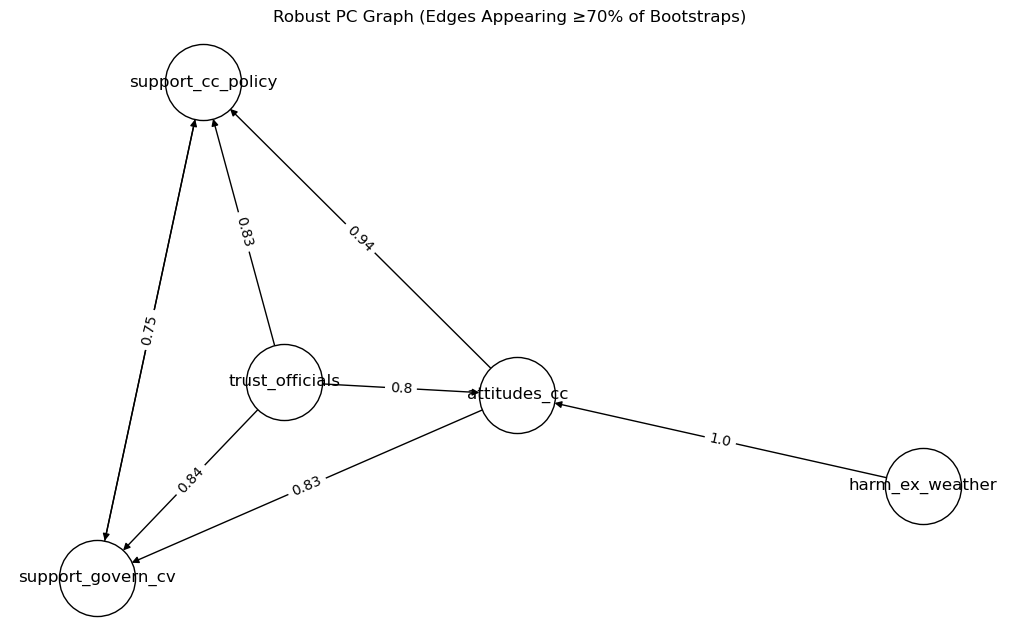

In [37]:
edge_probs = edge_counts / n_bootstraps
pc_stability_matrix = pd.DataFrame(edge_probs, index=node_labels, columns=node_labels)

# Build Graph 
G = nx.DiGraph()
G.add_nodes_from(node_labels)
threshold = 0.7

for i, source in enumerate(node_labels):
    for j, target in enumerate(node_labels):
        if i == j:
            continue
        prob = edge_probs[i, j]
        if prob >= threshold:
            G.add_edge(source, target, weight=prob, label=round(prob, 2))

# Plot
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='white',
        edgecolors='black', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Robust PC Graph (Edges Appearing ≥70% of Bootstraps)")
plt.show()

In [43]:
pc_stability_matrix

,support_cc_policy,attitudes_cc,support_govern_cv,trust_officials,harm_ex_weather
support_cc_policy,0.000,0.494,0.804,0.504,0.013
attitudes_cc,0.937,0.000,0.833,0.505,0.452
support_govern_cv,0.747,0.530,0.000,0.539,0.007
trust_officials,0.828,0.798,0.836,0.000,0.046
harm_ex_weather,0.039,1.000,0.234,0.217,0.000
